# 1.  Importando as Bibliotecas

In [202]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

import optuna

# 2. Funções

In [168]:
def plot_ckluters(data, name_cluster_pred="Cluters predict", hue_true='color', hue_pred=None, legend=False):
    fig, axs = plt.subplots(1, 2, figsize=(12,5), sharey=True)
    sns.scatterplot(data=data, x='x', y='y', hue=hue_true, ax=axs[0], legend=legend)
    sns.scatterplot(data=data, x='x', y='y', hue=hue_pred, ax=axs[1], legend=legend)
    axs[0].set_title('Cluster Reais')
    axs[1].set_title(name_cluster_pred)
    sns.despine()

# 3. Importando o Conjunto de Dados

In [65]:
df_basic1 = pd.read_csv('dataset/basic1.csv')
df_basic3 = pd.read_csv('dataset/basic3.csv')
df_network = pd.read_csv('dataset/network.csv')
df_spirals = pd.read_csv('dataset/spirals.csv')
df_un = pd.read_csv('dataset/un.csv')

In [73]:
X1 = df_basic1[['x', 'y']]

In [74]:
X1 = df_basic1[['x', 'y']]
X2 = df_basic3[['x', 'y']]
X3 = df_network[['x', 'y']]
X4 = df_spirals[['x', 'y']]
X5 = df_un[['x', 'y']]

# 4. Clusters Reais

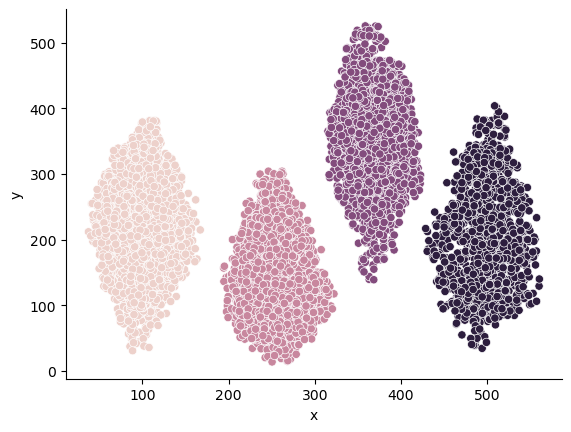

In [67]:
sns.scatterplot(data=df_basic1, x='x', y='y', hue='color', legend=False)
sns.despine()

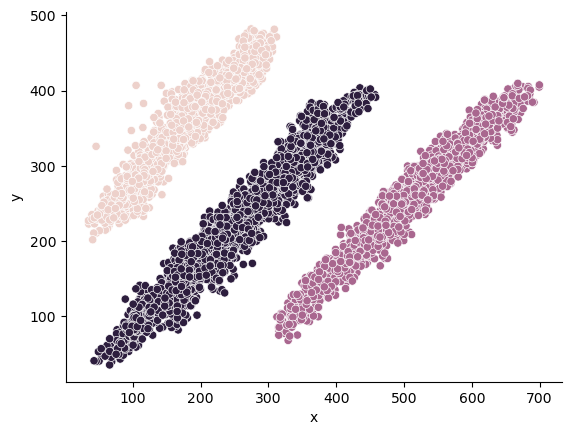

In [69]:
sns.scatterplot(data=df_basic3, x='x', y='y', hue='color', legend=False)
sns.despine()

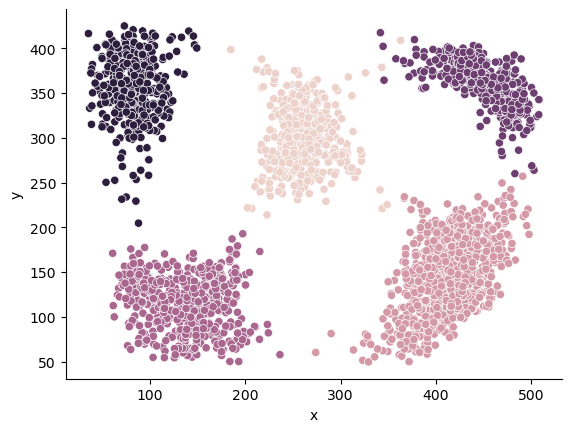

In [70]:
sns.scatterplot(data=df_network, x='x', y='y', hue='color', legend=False)
sns.despine()

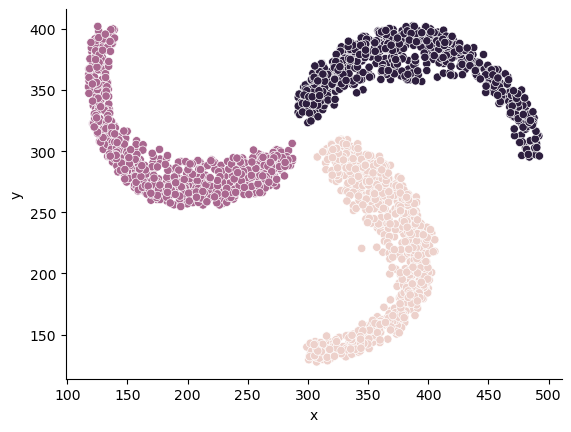

In [71]:
sns.scatterplot(data=df_spirals, x='x', y='y', hue='color', legend=False)
sns.despine()

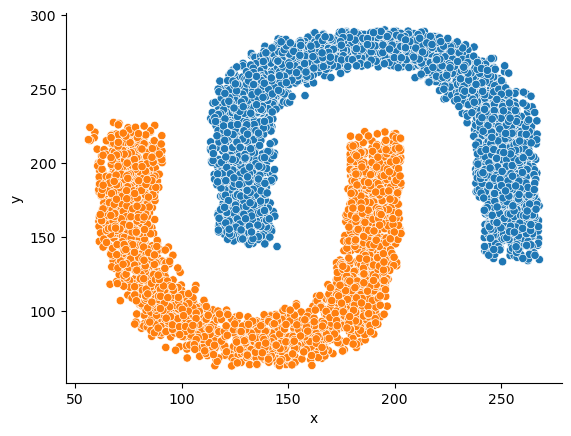

In [72]:
sns.scatterplot(data=df_un, x='x', y='y', hue='color', legend=False)
sns.despine()

# 5. Moldels

## 5.1 K-Means

In [110]:
# Definir o número de clusters
k = 4

# Instânciando o modelo
kmeans_1 = KMeans(
    n_clusters=k,      # Número de clusters
    init='k-means++',  # Você pode passar uma lista contendo lista de centróides caso tenha noção;
    n_init='auto',     # Número de inicializaçãoes aleatória. Se você passar os centróides em n_init, defina init=1;
    algorithm='lloyd', # Algoritmo que irá rodar 
    random_state=42)

# Treinando o modelo
y_pred_kmeans = kmeans_1.fit_predict(X1)

# Armazenando os valores
df_basic1['ypred_kmeans'] = y_pred_kmeans

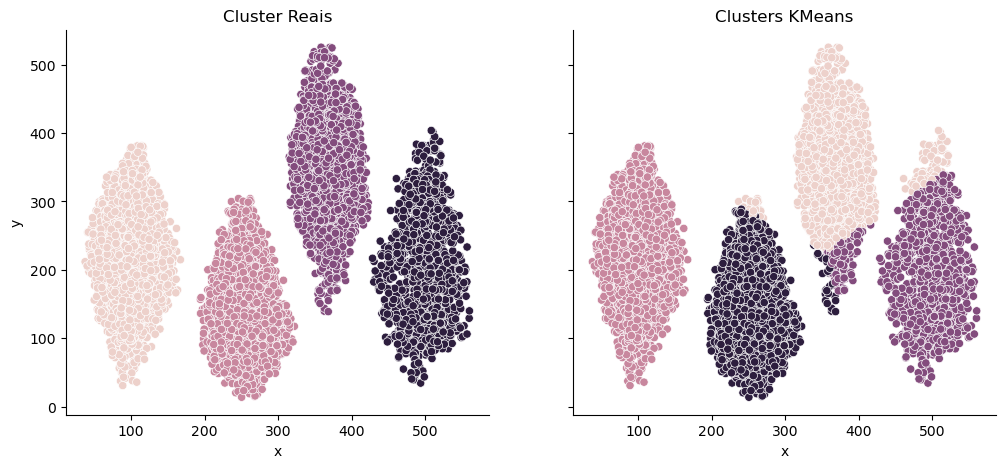

In [94]:
plot_ckluters(data=df_basic1, name_cluster_pred='Clusters KMeans', hue_true='color', hue_pred='ypred_kmeans')

In [111]:
# Definir o número de clusters
k = 3

# Instânciando o modelo
kmeans_2 = KMeans(
    n_clusters=k,      
    init='k-means++',  
    n_init='auto',     
    algorithm='lloyd', 
    random_state=42)

# Treinando o modelo
y_pred_kmeans = kmeans_2.fit_predict(X2)

# Armazenando os valores
df_basic3['ypred_kmeans'] = y_pred_kmeans

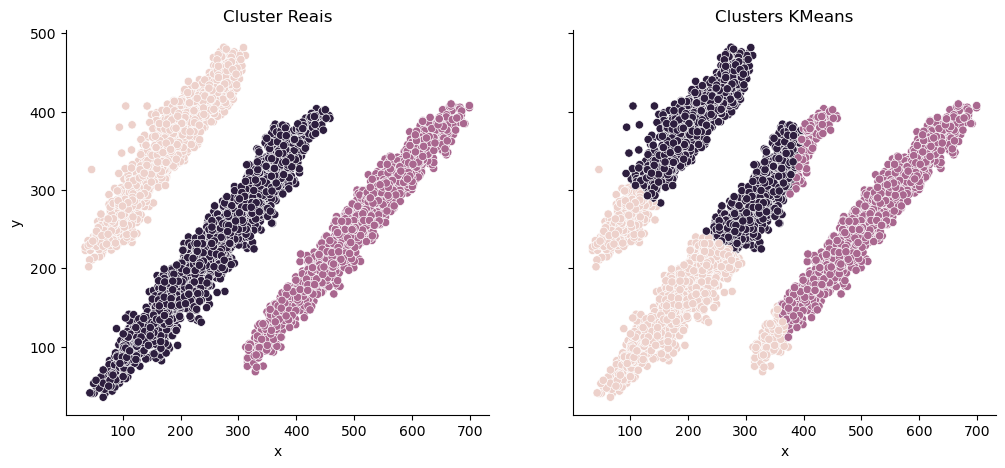

In [96]:
plot_ckluters(data=df_basic3, name_cluster_pred='Clusters KMeans', hue_true='color', hue_pred='ypred_kmeans')

In [106]:
# Definir o número de clusters
k = 5

# Instânciando o modelo
kmeans_3 = KMeans(
    n_clusters=k,     
    init='k-means++',  
    n_init='auto',     
    algorithm='lloyd', 
    random_state=42)

# Treinando o modelo
y_pred_kmeans = kmeans_3.fit_predict(X3)

# Armazenando os valores
df_network['ypred_kmeans'] = y_pred_kmeans

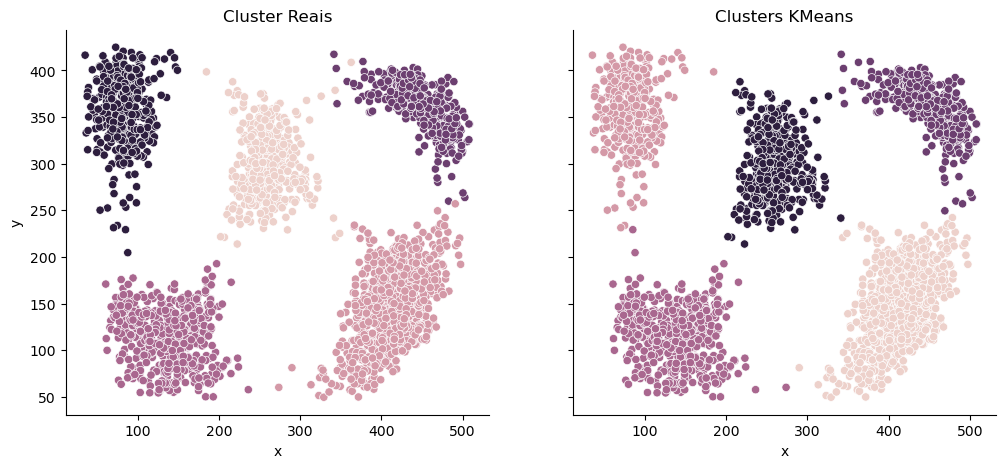

In [107]:
plot_ckluters(data=df_network, name_cluster_pred='Clusters KMeans', hue_true='color', hue_pred='ypred_kmeans')

In [114]:
# Definir o número de clusters
k = 3

# Instânciando o modelo
kmeans_4 = KMeans(
    n_clusters=k,    
    init='k-means++',
    n_init='auto',   
    algorithm='lloyd',
    random_state=42)

# Treinando o modelo
y_pred_kmeans = kmeans_4.fit_predict(X4)

# Armazenando os valores
df_spirals['ypred_kmeans'] = y_pred_kmeans

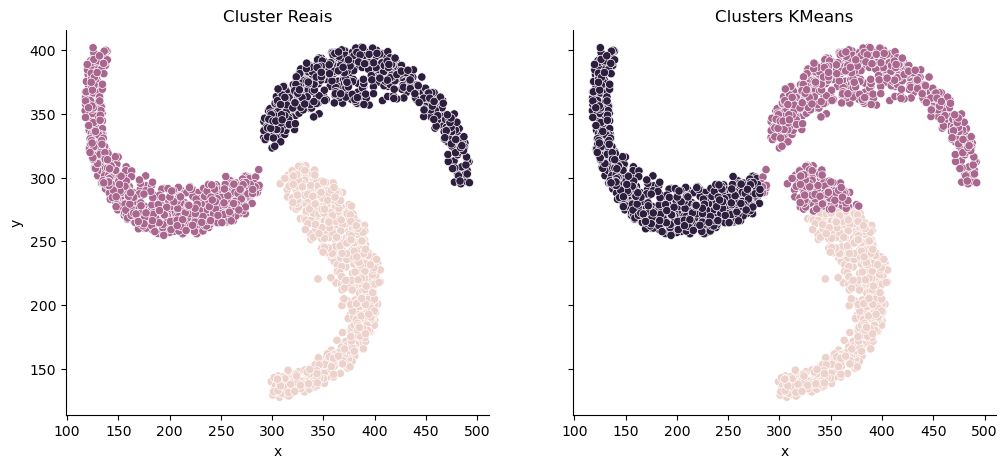

In [100]:
plot_ckluters(data=df_spirals, name_cluster_pred='Clusters KMeans', hue_true='color', hue_pred='ypred_kmeans')

In [117]:
# Definir o número de clusters
k = 2

# Instânciando o modelo
kmeans_5 = KMeans(
    n_clusters=k,     
    init='k-means++', 
    n_init='auto',    
    algorithm='lloyd',
    random_state=42)

# Treinando o modelo
y_pred_kmeans = kmeans_5.fit_predict(X5)

# Armazenando os valores
df_un['ypred_kmeans'] = y_pred_kmeans

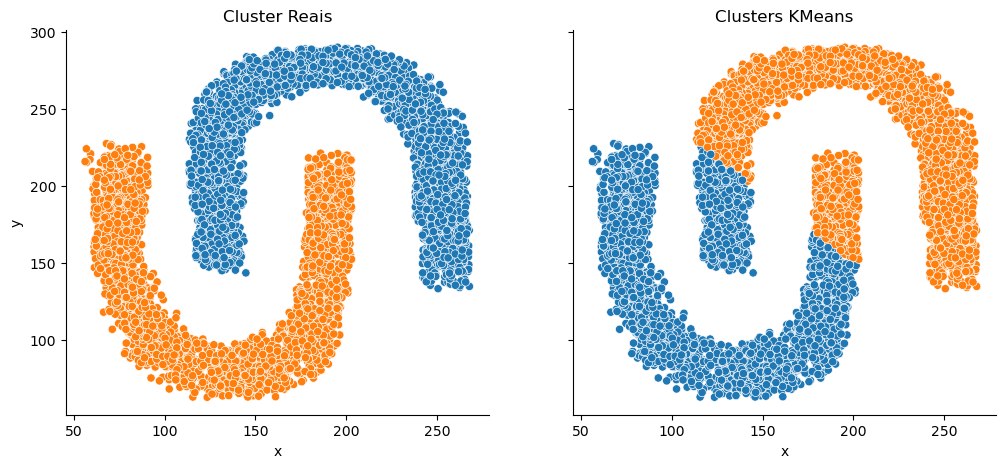

In [102]:
plot_ckluters(data=df_un, name_cluster_pred='Clusters KMeans', hue_true='color', hue_pred='ypred_kmeans')

In [103]:
from sklearn.metrics import silhouette_score

In [113]:
silhouette_score(X1, kmeans_1.labels_)

0.5368430193238266

In [112]:
silhouette_score(X2, kmeans_2.labels_)

0.46284534151333245

In [108]:
silhouette_score(X3, kmeans_3.labels_)

0.7126034598377666

In [115]:
silhouette_score(X4, kmeans_4.labels_)

0.5182148514793609

In [118]:
silhouette_score(X5, kmeans_5.labels_)

0.43604472423120366

## 5.2 DBscan

In [173]:
# Instânciando o modelo
dbscan_1 = DBSCAN(
    eps=10, 
    min_samples=5
)

# Treinando o modelo
dbscan_1.fit(X1)
y_pred_dbscan = dbscan_1.labels_

# Armazenando os valores
df_basic1['ypred_dbscan'] = y_pred_dbscan

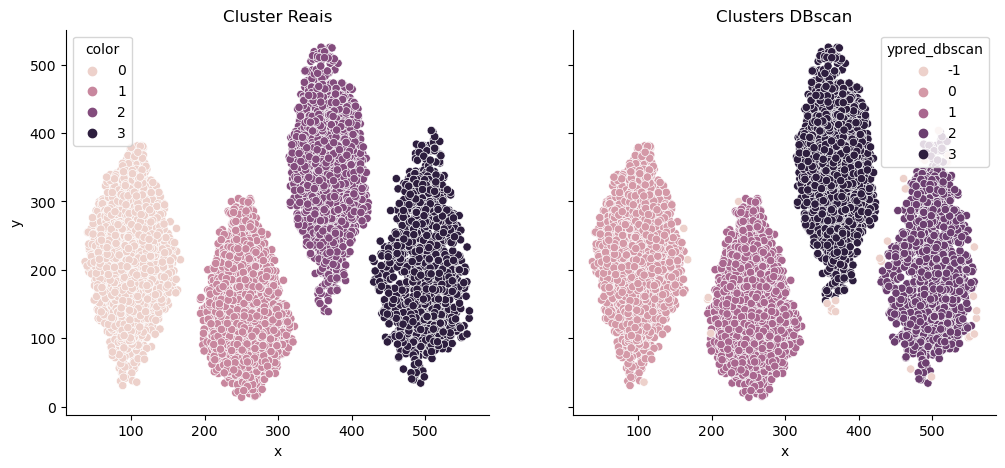

In [174]:
plot_ckluters(data=df_basic1, name_cluster_pred='Clusters DBscan', hue_true='color', hue_pred='ypred_dbscan', legend=True)

In [175]:
# Instânciando o modelo
dbscan_2 = DBSCAN(
    eps=10, 
    min_samples=5
)

# Treinando o modelo
dbscan_2.fit(X2)
y_pred_dbscan = dbscan_2.labels_

# Armazenando os valores
df_basic3['ypred_dbscan'] = y_pred_dbscan

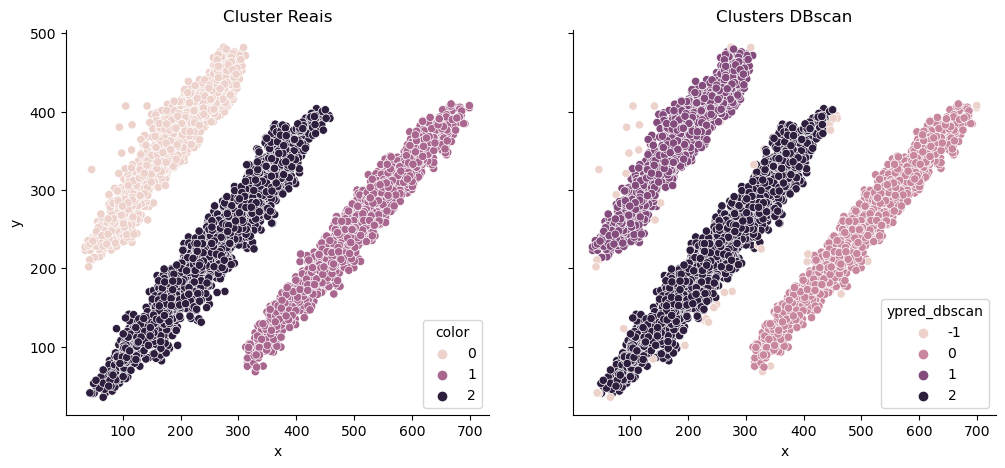

In [176]:
plot_ckluters(data=df_basic3, name_cluster_pred='Clusters DBscan', hue_true='color', hue_pred='ypred_dbscan', legend=True)

In [184]:
# Instânciando o modelo
dbscan_3 = DBSCAN(
    eps=15, 
    min_samples=10
)

# Treinando o modelo
dbscan_3.fit(X3)
y_pred_dbscan = dbscan_3.labels_

# Armazenando os valores
df_network['ypred_dbscan'] = y_pred_dbscan

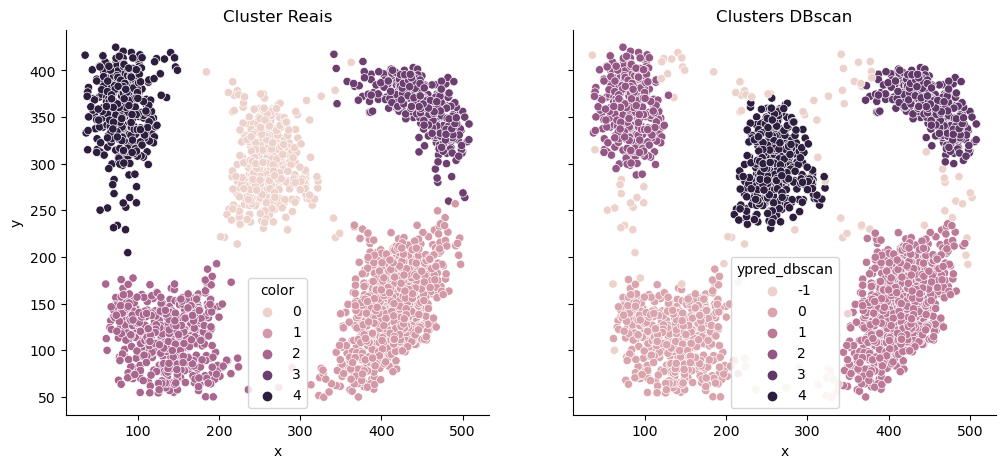

In [185]:
plot_ckluters(data=df_network, name_cluster_pred='Clusters DBscan', hue_true='color', hue_pred='ypred_dbscan', legend=True)

In [187]:
# Instânciando o modelo
dbscan_4 = DBSCAN(
    eps=15, 
    min_samples=10
)

# Treinando o modelo
dbscan_4.fit(X4)
y_pred_dbscan = dbscan_4.labels_

# Armazenando os valores
df_spirals['ypred_dbscan'] = y_pred_dbscan

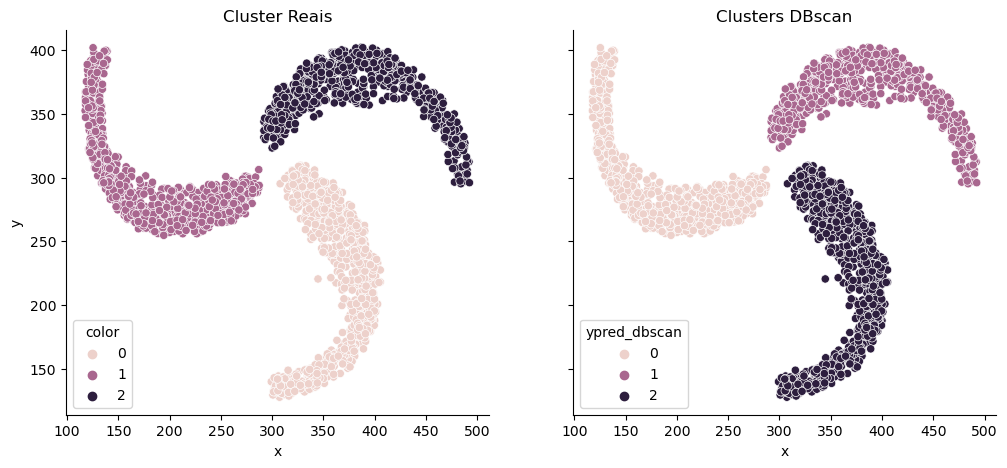

In [188]:
plot_ckluters(data=df_spirals, name_cluster_pred='Clusters DBscan', hue_true='color', hue_pred='ypred_dbscan', legend=True)

In [221]:
def objective(trial):
    eps = trial.suggest_float('eps', 1, 20, step=0.5)
    min_samples = trial.suggest_int('min_samples', 3, 30)
    
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    
    labels = dbscan.fit_predict(X5)

    if len(set(labels)) > 1:
        score = silhouette_score(X5, labels)
    else:
        score = -1.0
    
    return score

In [222]:
study = optuna.create_study(direction='maximize')

study.optimize(objective, n_trials=100)

[I 2024-09-29 13:16:32,803] A new study created in memory with name: no-name-74f7bd17-db0c-4ce4-b307-9c78211401e2
[I 2024-09-29 13:16:34,577] Trial 0 finished with value: 0.3278952728420047 and parameters: {'eps': 17.0, 'min_samples': 29}. Best is trial 0 with value: 0.3278952728420047.
[I 2024-09-29 13:16:36,110] Trial 1 finished with value: 0.3278952728420047 and parameters: {'eps': 16.0, 'min_samples': 11}. Best is trial 0 with value: 0.3278952728420047.
[I 2024-09-29 13:16:37,535] Trial 2 finished with value: 0.1691933482265819 and parameters: {'eps': 6.5, 'min_samples': 6}. Best is trial 0 with value: 0.3278952728420047.
[I 2024-09-29 13:16:39,027] Trial 3 finished with value: 0.3278952728420047 and parameters: {'eps': 12.5, 'min_samples': 11}. Best is trial 0 with value: 0.3278952728420047.
[I 2024-09-29 13:16:40,610] Trial 4 finished with value: 0.3278952728420047 and parameters: {'eps': 19.5, 'min_samples': 19}. Best is trial 0 with value: 0.3278952728420047.
[I 2024-09-29 13:1

[I 2024-09-29 13:17:47,962] Trial 47 finished with value: 0.08590233112597456 and parameters: {'eps': 3.5, 'min_samples': 5}. Best is trial 0 with value: 0.3278952728420047.
[I 2024-09-29 13:17:49,453] Trial 48 finished with value: 0.17497565195294879 and parameters: {'eps': 9.0, 'min_samples': 27}. Best is trial 0 with value: 0.3278952728420047.
[I 2024-09-29 13:17:50,996] Trial 49 finished with value: 0.3278952728420047 and parameters: {'eps': 13.0, 'min_samples': 14}. Best is trial 0 with value: 0.3278952728420047.
[I 2024-09-29 13:17:52,520] Trial 50 finished with value: 0.3278952728420047 and parameters: {'eps': 14.5, 'min_samples': 21}. Best is trial 0 with value: 0.3278952728420047.
[I 2024-09-29 13:17:54,081] Trial 51 finished with value: 0.3278952728420047 and parameters: {'eps': 17.0, 'min_samples': 9}. Best is trial 0 with value: 0.3278952728420047.
[I 2024-09-29 13:17:55,641] Trial 52 finished with value: 0.3278952728420047 and parameters: {'eps': 17.5, 'min_samples': 11}. 

[I 2024-09-29 13:18:58,990] Trial 94 finished with value: 0.3278952728420047 and parameters: {'eps': 15.5, 'min_samples': 26}. Best is trial 0 with value: 0.3278952728420047.
[I 2024-09-29 13:19:00,538] Trial 95 finished with value: 0.3278952728420047 and parameters: {'eps': 18.5, 'min_samples': 7}. Best is trial 0 with value: 0.3278952728420047.
[I 2024-09-29 13:19:02,080] Trial 96 finished with value: 0.3278952728420047 and parameters: {'eps': 16.0, 'min_samples': 17}. Best is trial 0 with value: 0.3278952728420047.
[I 2024-09-29 13:19:03,598] Trial 97 finished with value: 0.3278952728420047 and parameters: {'eps': 12.0, 'min_samples': 23}. Best is trial 0 with value: 0.3278952728420047.
[I 2024-09-29 13:19:05,125] Trial 98 finished with value: 0.3278952728420047 and parameters: {'eps': 13.5, 'min_samples': 25}. Best is trial 0 with value: 0.3278952728420047.
[I 2024-09-29 13:19:06,672] Trial 99 finished with value: 0.3278952728420047 and parameters: {'eps': 17.5, 'min_samples': 20}.

In [223]:
# Exibir os melhores parâmetros e o melhor score
print(f"Melhores parâmetros: {study.best_params}, Melhor Silhouette Score: {study.best_value}")

Melhores parâmetros: {'eps': 17.0, 'min_samples': 29}, Melhor Silhouette Score: 0.3278952728420047


In [225]:
dbscan = DBSCAN(**study.best_params)

In [226]:
dbscan.fit(X5)

DBSCAN(eps=17.0, min_samples=29)

In [227]:
dbscan

DBSCAN(eps=17.0, min_samples=29)

In [228]:
dbscan.fit(X5)
y_pred_dbscan = dbscan.labels_

# Armazenando os valores
df_un['ypred_dbscan'] = y_pred_dbscan

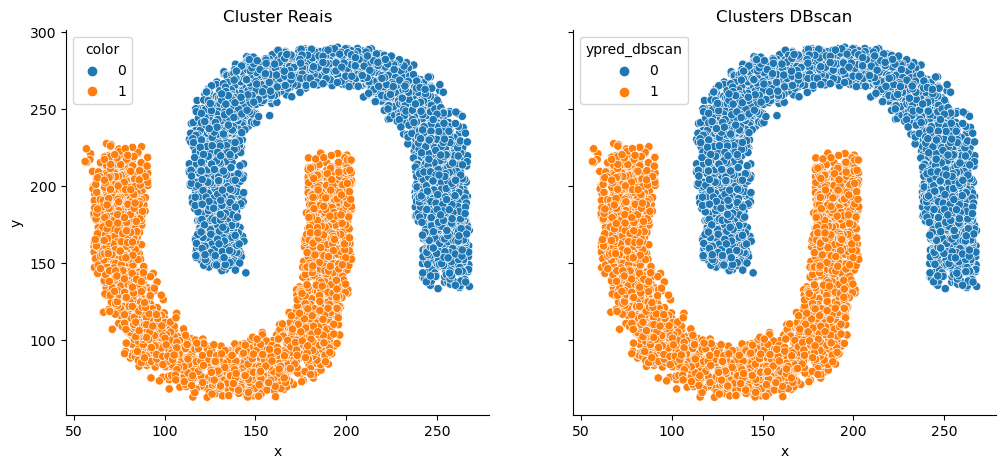

In [229]:
plot_ckluters(data=df_un, name_cluster_pred='Clusters DBscan', hue_true='color', hue_pred='ypred_dbscan', legend=True)

# 6. Conclusões

* O algoritmo _**KMeans**_, apesar de rápido, apresenta algumas limitações. É ideal para clusters com características mais centrais, ou seja, instâncias que estão concentrada em torno de um centor, ao invés de estarem mais dispersas no seu grupo. Isso pode ser visto na figura 03, onde o algoritmo, aparentemente, apresentou melhor desempenho, refletindo até no coeficiente de silhouette. Já nas demais base de dados, teve um desempenhou um pouco abaixo, isso por conta que as instância estão mais dispersas de seus centros.

* O algoritmo _**DBscan**_ é mais flexível que o KMeans. Isso se deve ao fato desse algoritmo se basear em regiões de alta densidade.

**Obsevação:**
Como o objetivo era apenas identificar como cada algoritmo se comporta em relação a diferentes formatos de clusters, não foi realizado um estudo prévio para definir o número de clusters ideias(*k*), visto que o número de grupos já eram conhecidos.